# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [ ]:
chipo.groupby('item_name').value_counts()

In [20]:
top_5_items_count=chipo['item_name'].value_counts().head(5).values
top_5_items_count

array([726, 553, 479, 368, 301], dtype=int64)

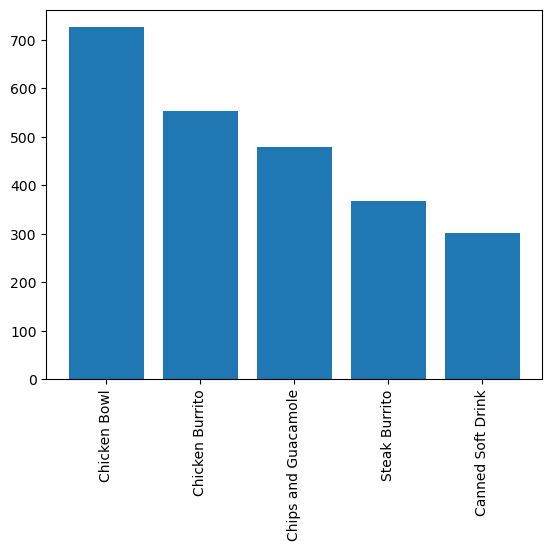

In [30]:
top_5_items=chipo['item_name'].value_counts().head(5).index
top_5_items_count=chipo['item_name'].value_counts().head(5).values

plt.bar(top_5_items,top_5_items_count)
plt.xticks(rotation=90)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [8]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [10]:
chipo['item_price']=chipo['item_price'].str.replace('$','').astype(float)
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


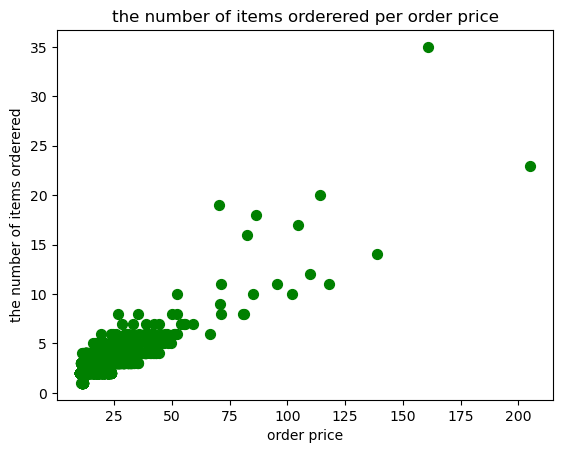

In [28]:
grouped_df=chipo.groupby('order_id')[['quantity','item_price']].aggregate('sum')
plt.scatter(x='item_price',y='quantity', data=grouped_df, color='green',s=50)
plt.xlabel('order price')
plt.ylabel('the number of items orderered')
plt.title('the number of items orderered per order price')
plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.

Create a barplot showing the top 10 highest order prices per order_id.

In [12]:
grouping=chipo.groupby('order_id')[['item_price']].aggregate('sum').reset_index()
grouping

,order_id,item_price
0,1,11.56
1,2,16.98
2,3,12.67
3,4,21.00
4,5,13.70
...,...,...
1829,1830,23.00
1830,1831,12.90
1831,1832,13.20
1832,1833,23.50


In [13]:
grouping_top10=grouping.sort_values(by='item_price',ascending=False).head(10)
grouping_top10

,order_id,item_price
925,926,205.25
1442,1443,160.74
1482,1483,139.00
690,691,118.25
1785,1786,114.30
204,205,109.90
510,511,104.59
490,491,102.00
1448,1449,95.39
758,759,86.30


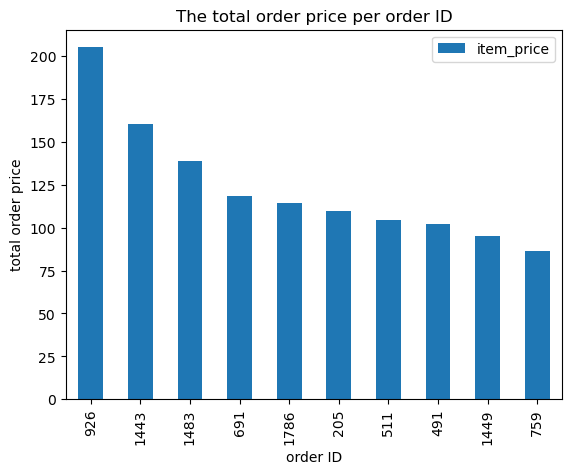

In [27]:
grouping_top10.plot(x='order_id', y='item_price',kind='bar')
plt.xlabel('order ID')
plt.ylabel('total order price')
plt.title("The total order price per order ID")
plt.show()